# Data visualization with pandas, seaborn and scikit-plot

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scikitplot as skplt
import numpy as np
from statsmodels import api as sm
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits as load_data
from sklearn.cluster import KMeans
import multiprocessing

n_cpu = multiprocessing.cpu_count()
sns.set_style("darkgrid")

In [2]:
def get_movie_data():
    df = pd.read_csv('data/movie_ratings.csv')
    df.columns = ["film", "genre", "critic_ratings", "audience_ratings", "budget", "release_year"]
    df.film = df.film.astype("category")
    df.genre = df.genre.astype("category")
    df.release_year = df.release_year.astype("category")
    return df

## Correlation matrix

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
correlation = df.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


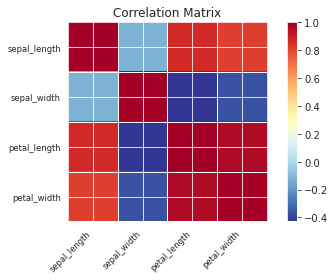

In [5]:
# red stronger positive correlation, blue stronger negative correlation
sm.graphics.plot_corr(correlation, xnames=correlation.columns);

In [6]:
df = pd.read_csv('data/happy.csv')
df = df[["Happiness Score", "Family", "Economy (GDP per Capita)", "Freedom", "Generosity"]]
df.head()

,Happiness Score,Family,Economy (GDP per Capita),Freedom,Generosity
0,7.587,1.34951,1.39651,0.66557,0.29678
1,7.561,1.40223,1.30232,0.62877,0.43630
2,7.527,1.36058,1.32548,0.64938,0.34139
3,7.522,1.33095,1.45900,0.66973,0.34699
4,7.427,1.32261,1.32629,0.63297,0.45811


In [7]:
correlation = df.corr()
correlation

,Happiness Score,Family,Economy (GDP per Capita),Freedom,Generosity
Happiness Score,1.000000,0.740605,0.780966,0.568211,0.180319
Family,0.740605,1.000000,0.645299,0.441518,0.087513
Economy (GDP per Capita),0.780966,0.645299,1.000000,0.370300,-0.010465
Freedom,0.568211,0.441518,0.370300,1.000000,0.373916
Generosity,0.180319,0.087513,-0.010465,0.373916,1.000000


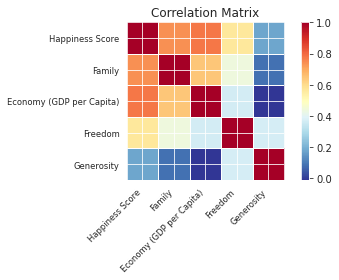

In [8]:
sm.graphics.plot_corr(correlation, xnames=correlation.columns);

## Using pandas plot

In [9]:
df = pd.read_csv('data/spotify.csv', index_col='Date', parse_dates=True)
df.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


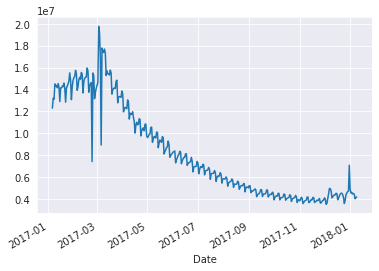

In [10]:
df["Shape of You"].plot()

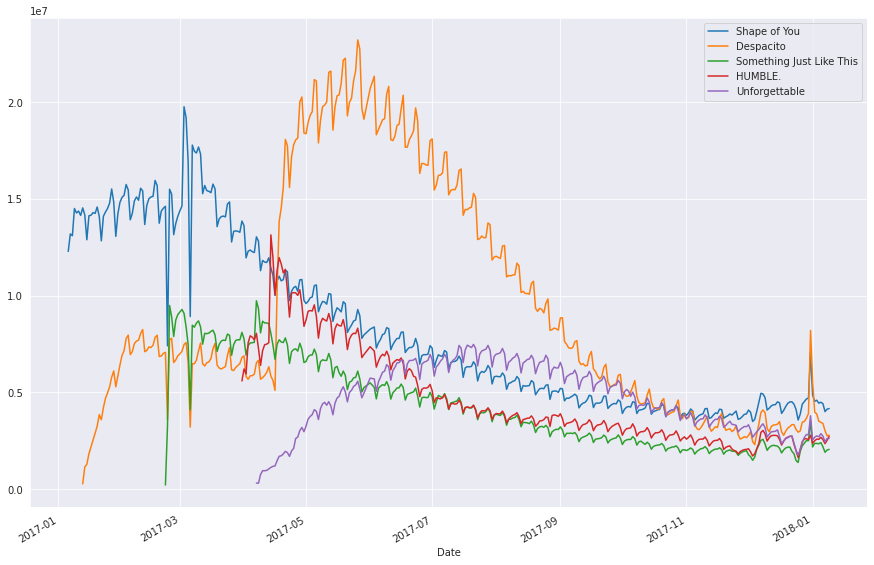

In [11]:
df.plot(figsize=(15, 10))

## Count plot

Show counts of observations in each categorical bin using bars

In [12]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


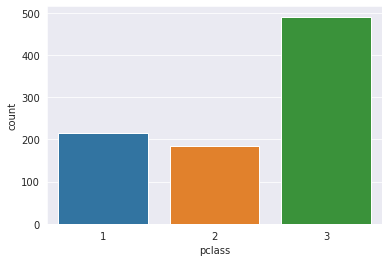

In [13]:
sns.countplot(df.pclass)

## Pair plot

In [14]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


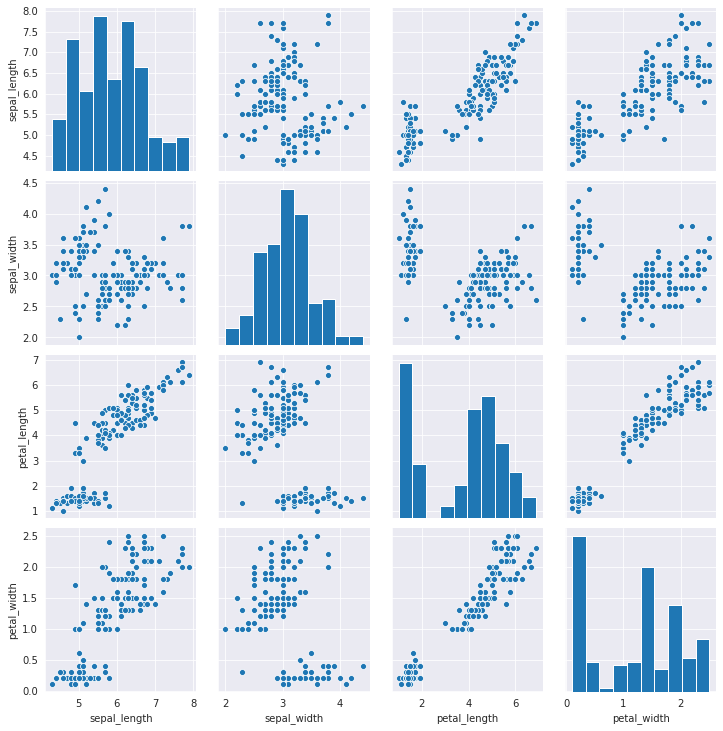

In [15]:
sns.pairplot(df)

## Line plot

Line charts are best to show trends over a period of time and multiple lines can be used to show trends in more than one group

In [16]:
df = pd.read_csv('data/spotify.csv', index_col='Date', parse_dates=True)
df.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


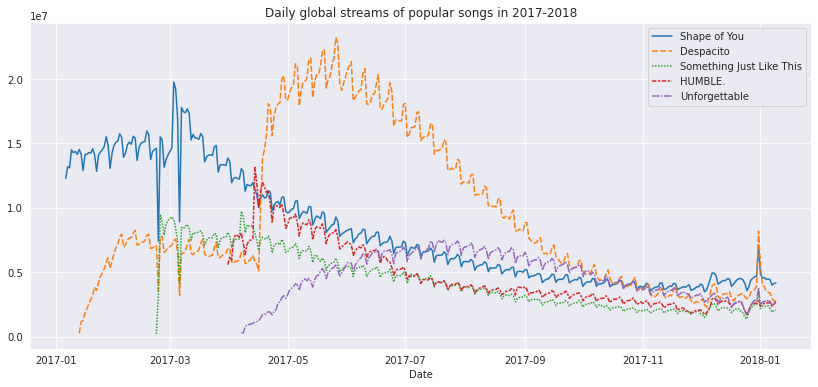

In [17]:
plt.figure(figsize=(14,6))
plt.title("Daily global streams of popular songs in 2017-2018")

sns.lineplot(data=df)

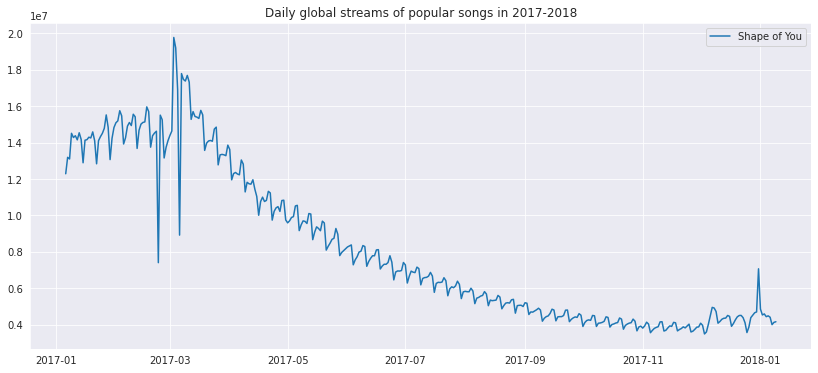

In [18]:
song = "Shape of You"

plt.figure(figsize=(14,6))
plt.title("Daily global streams of popular songs in 2017-2018")

sns.lineplot(data=df[song], label=song)

## Bar charts

Bar charts are useful for comparing quantities corresponding to different groups. The lengths is proportional to the discrete values that they represent.

In [19]:
data = pd.read_csv('data/flight_delays.csv')
data.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Text(0, 0.5, 'Arrival delay (in minutes)')

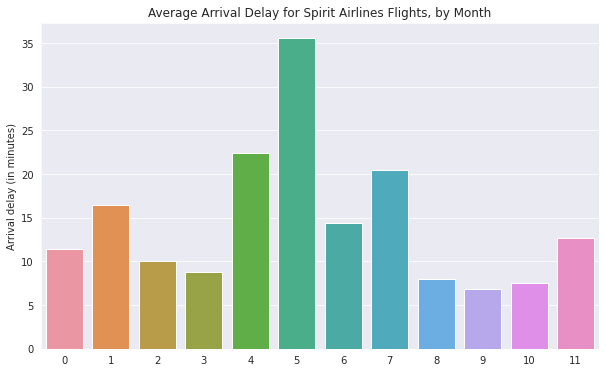

In [20]:
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
sns.barplot(x=data.index, y=data['NK'])
plt.ylabel("Arrival delay (in minutes)")

In [21]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


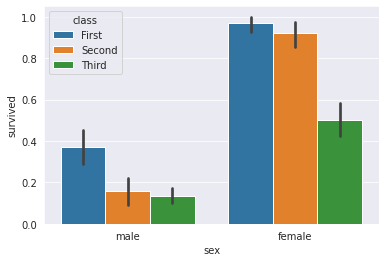

In [22]:
sns.barplot(x="sex", y="survived", hue="class", data=df);

## Heatmaps

Heatmaps can be used to find color coded patterns in tables of numbers

In [23]:
data = pd.read_csv('data/flight_delays.csv')
data.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Text(0.5, 42.0, 'Airline')

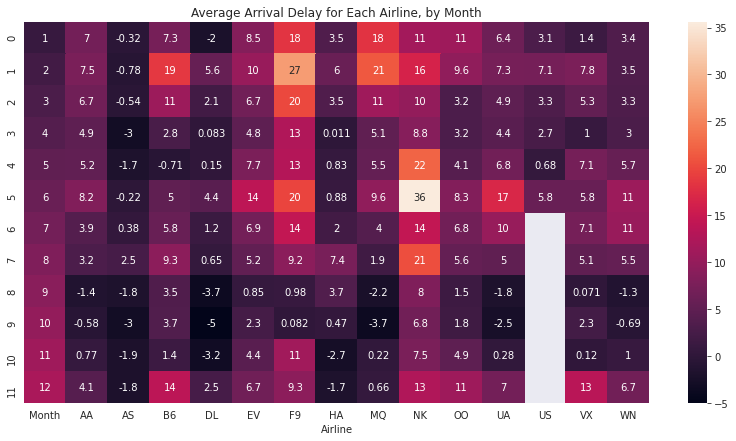

In [24]:
plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=data, annot=True)
plt.xlabel("Airline")

## Scatter plots

Scatter plots show the relationship between two continuous variables; if color coded we can also show the relationship with a third categorical variable

In [25]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


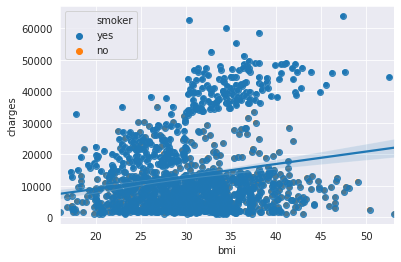

In [26]:
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'])
sns.regplot(x=data["bmi"], y=data["charges"])

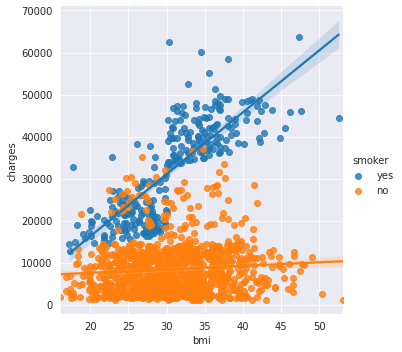

In [27]:
# multiple color coded and regression lines
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data)

## Scatter matrix

In [28]:
df = pd.read_csv('data/happy.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [29]:
smaller_df = df[["Happiness Score", "Family", "Economy (GDP per Capita)", "Freedom"]]
smaller_df.head()

,Happiness Score,Family,Economy (GDP per Capita),Freedom
0,7.587,1.34951,1.39651,0.66557
1,7.561,1.40223,1.30232,0.62877
2,7.527,1.36058,1.32548,0.64938
3,7.522,1.33095,1.45900,0.66973
4,7.427,1.32261,1.32629,0.63297


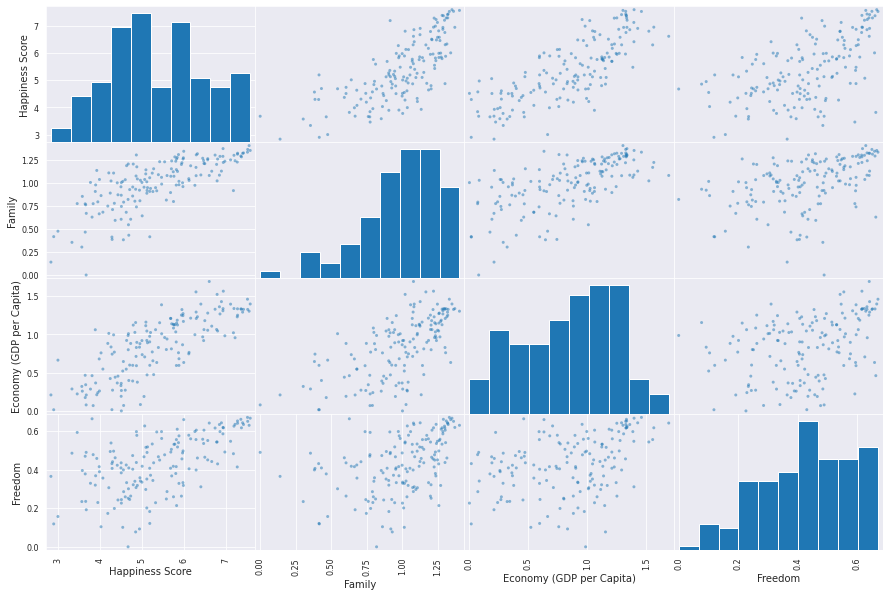

In [30]:
scatter_matrix(smaller_df, figsize=(15, 10));

## Jointplot

scatter plot with distributions of the variables at the top and right.

In [31]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


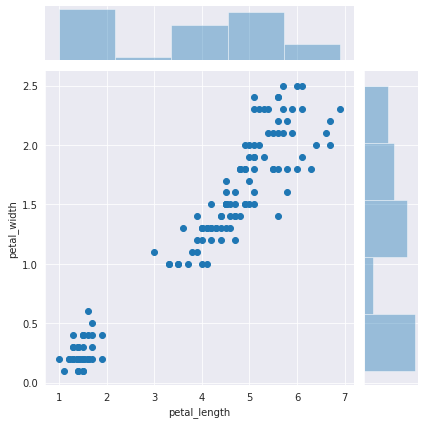

In [32]:
sns.jointplot(data=df, x="petal_length", y="petal_width", kind='scatter')

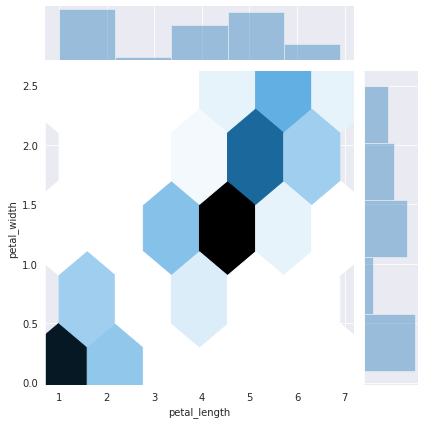

In [33]:
sns.jointplot(data=df, x="petal_length", y="petal_width", kind='hex')

## Swarm plot

Categorical scatter plots show the relationship between a continous variable and a categorical variable

In [34]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


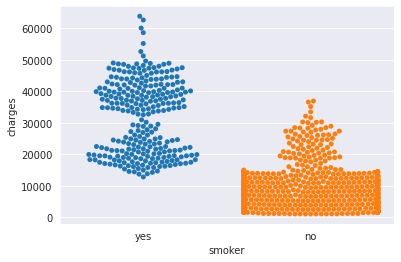

In [35]:
sns.swarmplot(x=data['smoker'],
              y=data['charges'])

## Box plot & Violin plot

Displays groups of numerical data through their quartiles: 

* minimum
* first quartile
* median
* third quartile
* maximum

Differences:

* width of a violin plot tells how how much data is in that area

In [36]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


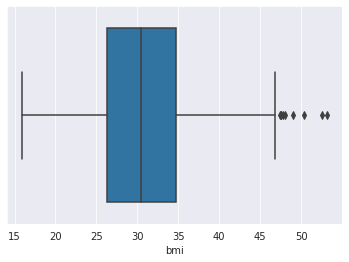

In [37]:
sns.boxplot(x=data.bmi)

In [38]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'Iris')

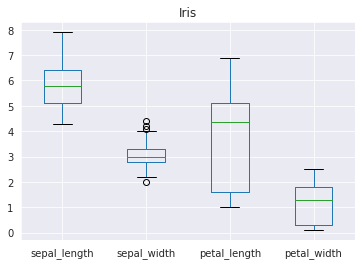

In [39]:
data.boxplot()
plt.title("Iris")

Text(0.5, 1.0, 'Iris')

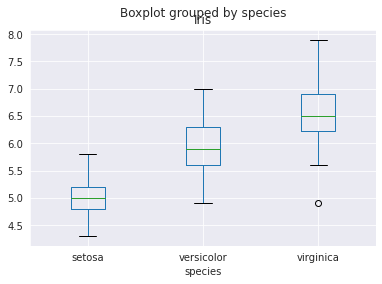

In [40]:
data.boxplot(column="sepal_length", by="species")
plt.title("Iris")

In [41]:
df = get_movie_data()
df.head()

,film,genre,critic_ratings,audience_ratings,budget,release_year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


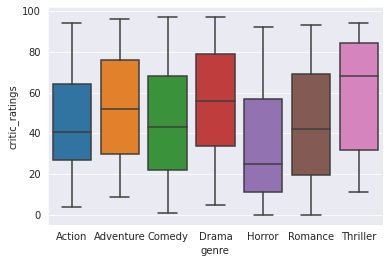

In [42]:
sns.boxplot(data=df, x="genre", y="critic_ratings")

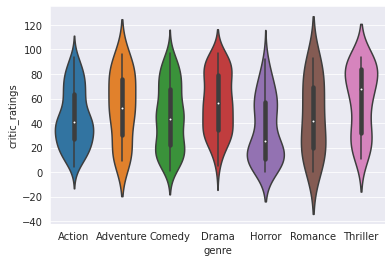

In [43]:
sns.violinplot(data=df, x="genre", y="critic_ratings")

## Histograms

Histograms show the distribution of a single numerical variable

Provides graphical representation of the distribution of numerical data. Consists of rectangles whose area is proporitional to the frequency of a variable

In [44]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


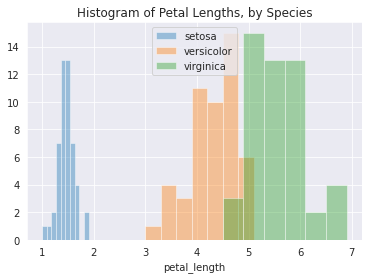

In [45]:
sns.distplot(a=data[data.species == 'setosa']["petal_length"], label="setosa", kde=False)
sns.distplot(a=data[data.species == 'versicolor']["petal_length"], label="versicolor", kde=False)
sns.distplot(a=data[data.species == 'virginica']["petal_length"], label="virginica", kde=False)

plt.title("Histogram of Petal Lengths, by Species")
plt.legend()

## Pie chart

a circle is divided into sectors that each represent a proportion of the whole

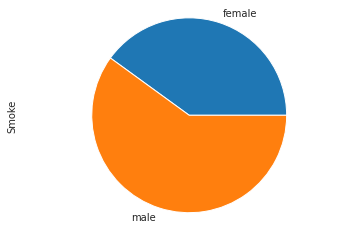

In [46]:
df = pd.DataFrame({'Sex': ['female', 'male', 'female'], 'Smoke': [1, 3, 1]})

df.Smoke.groupby(df.Sex).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

## Density plot

Kernel Density Estimate plots (1D and 2D) show an estimated, smooth distribution of a single numerical variable (or two numerical variables)

In [47]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


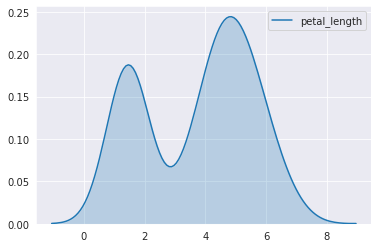

In [48]:
sns.kdeplot(data=data['petal_length'], shade=True)

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

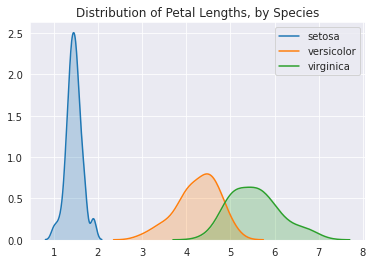

In [49]:
sns.kdeplot(data=data[data.species == 'setosa']["petal_length"], label="setosa", shade=True)
sns.kdeplot(data=data[data.species == 'versicolor']["petal_length"], label="versicolor", shade=True)
sns.kdeplot(data=data[data.species == 'virginica']["petal_length"], label="virginica", shade=True)

plt.title("Distribution of Petal Lengths, by Species")

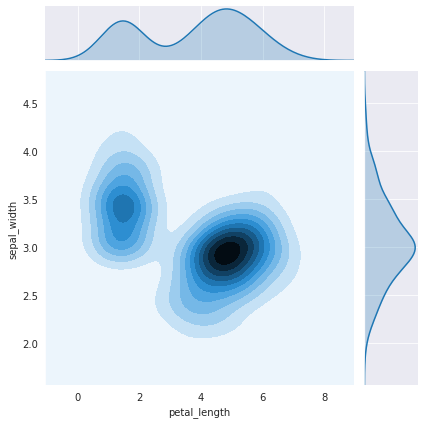

In [50]:
sns.jointplot(x=data['petal_length'], y=data['sepal_width'], kind="kde")

## Subplots

In [51]:
df = get_movie_data()
df.head()

,film,genre,critic_ratings,audience_ratings,budget,release_year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


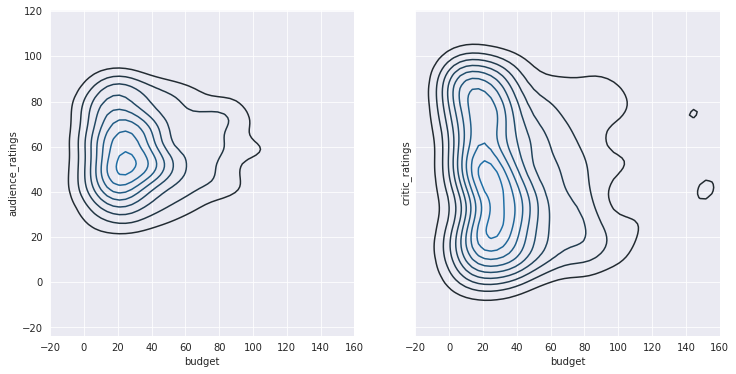

In [52]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
k1 = sns.kdeplot(df.budget, df.audience_ratings, ax=axes[0])
k1.set(xlim=(-20, 160))
k2 = sns.kdeplot(df.budget, df.critic_ratings, ax=axes[1])

## Facet grid

In [53]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


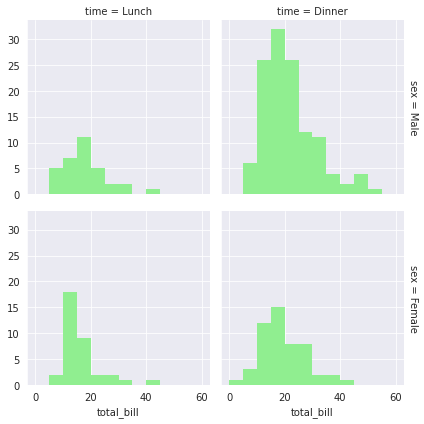

In [54]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="lightgreen", bins=bins, lw=0)

In [55]:
df = get_movie_data()
df.head()

,film,genre,critic_ratings,audience_ratings,budget,release_year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


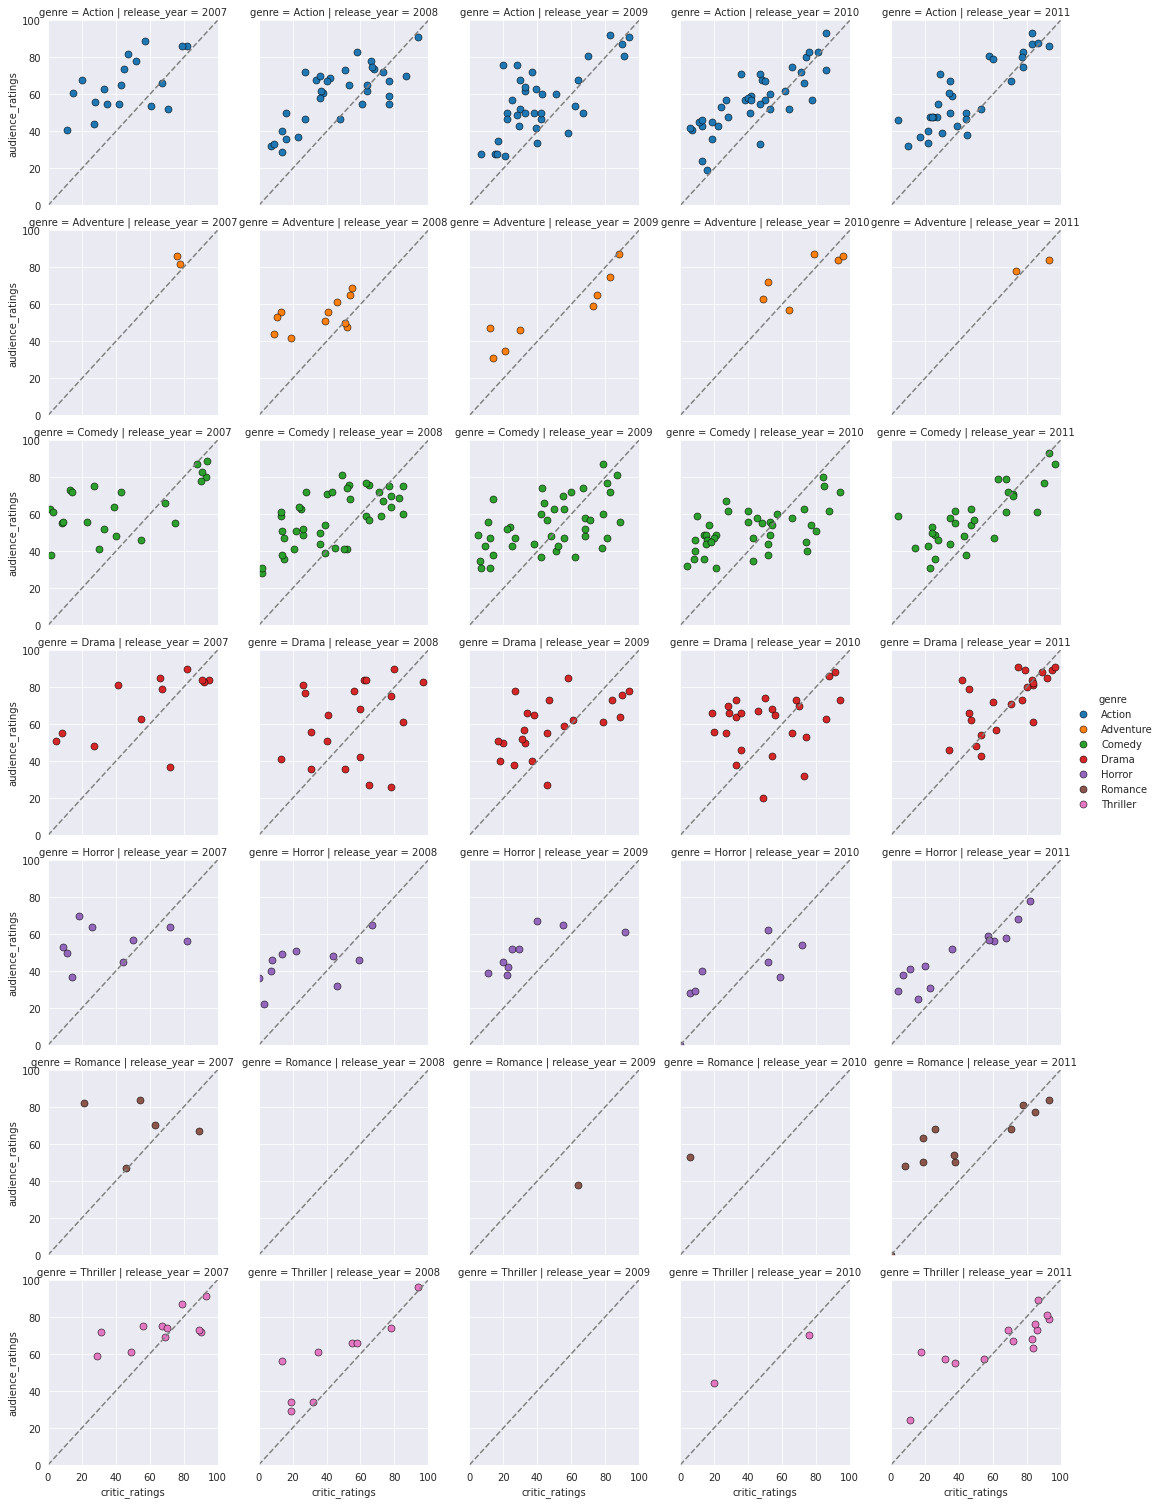

In [56]:
g = sns.FacetGrid(df, row="genre", col='release_year', hue="genre")
kws = {
    's': 50,
    'linewidth': 0.5,
    'edgecolor': "black"
}
g = g.map(plt.scatter, "critic_ratings", "audience_ratings", **kws)
g.set(xlim=(0, 100), ylim=(0, 100))

for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c="gray", ls="--")
    
g.add_legend()

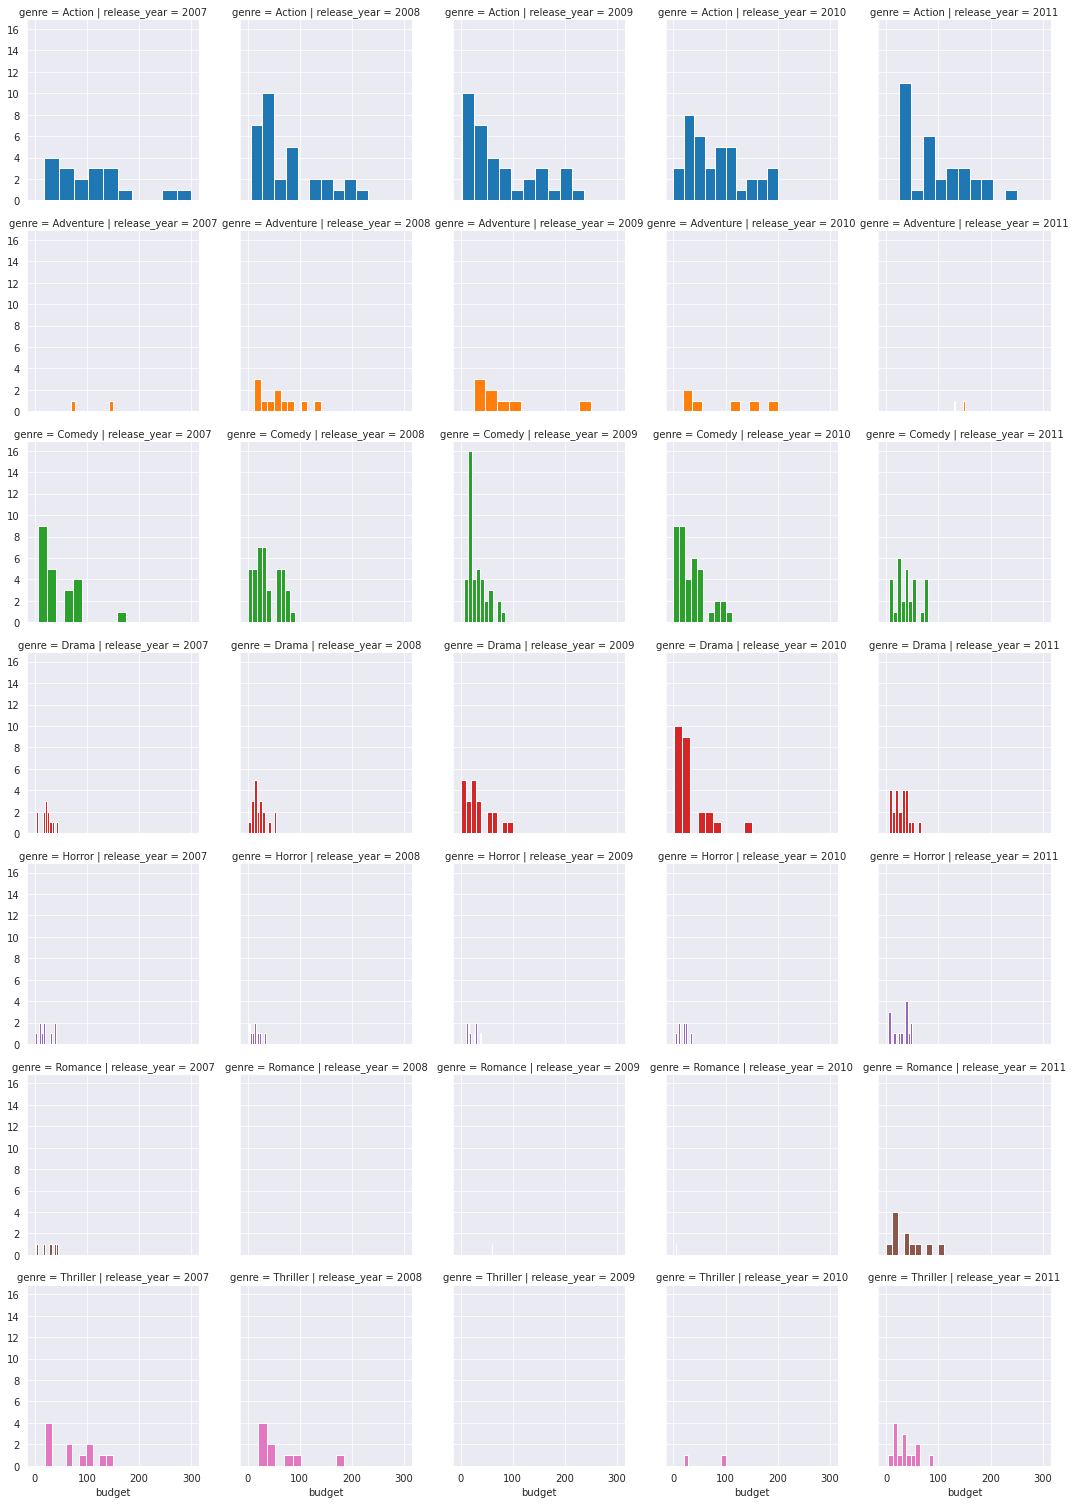

In [57]:
g = sns.FacetGrid(df, row="genre", col='release_year', hue="genre")
g = g.map(plt.hist, "budget")

## Confusion Matrix

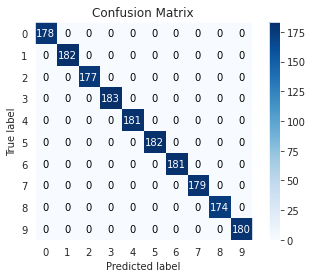

In [58]:
X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
rf.fit(X, y)
preds = rf.predict(X)
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=preds)
plt.show()

## Elbow curve

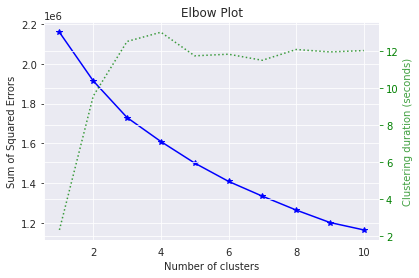

In [59]:
X, y = load_data(return_X_y=True)
kmeans = KMeans(random_state=1)
skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 11))

## Learning curve


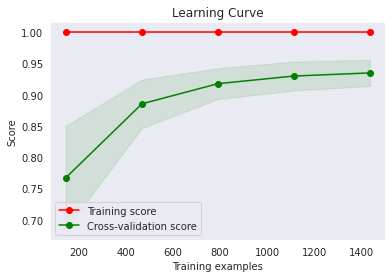

In [60]:
X, y = load_data(return_X_y=True)
rf = RandomForestClassifier()
skplt.estimators.plot_learning_curve(rf, X, y)

## ROC AUC

should only be used on balanced dataset. Value between 0.5 and 1.0, closer to 1.0 is better.

In [61]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [62]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

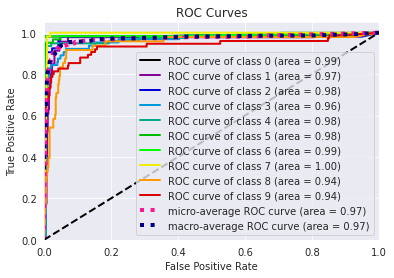

In [63]:
predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)

## Precision-Recall curve

should be used for imbalanced dataset.

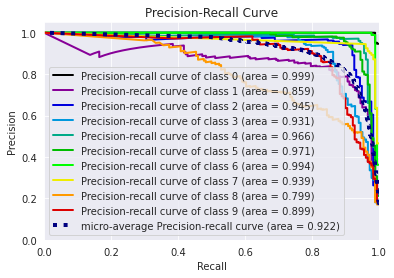

In [64]:
X, y = load_data(return_X_y=True)
nb = GaussianNB()
nb.fit(X, y)
probas = nb.predict_proba(X)
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)